## Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


### Loading Model

In [3]:
model = tf.keras.models.load_model('trained_model.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualizing Single Image of test set

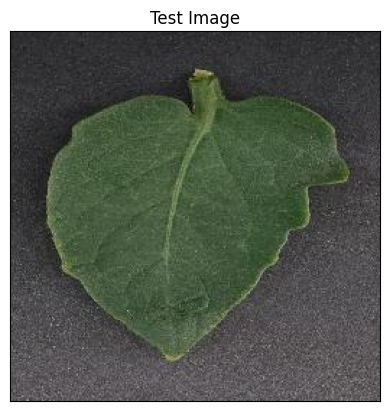

In [47]:
import cv2
image_path = 'test\TomatoHealthy2.JPG'
# reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting BGR to RGB
# displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [48]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [49]:
predictions = model.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 26ms/step
[[2.99567273e-05 7.88444777e-06 9.17544312e-05 2.10293962e-04
  2.91486431e-05 5.44134309e-05 5.77823266e-05 8.07905417e-06
  7.60624198e-06 3.03083880e-06 1.28758629e-05 1.35262894e-06
  1.72015516e-05 1.10935925e-05 4.03334852e-05 2.42729243e-06
  6.26100973e-06 2.36591295e-05 1.12057596e-05 3.87184846e-05
  1.62757067e-06 1.44492324e-05 5.85858743e-06 1.74615184e-06
  2.47603748e-06 1.09601770e-05 7.59978491e-07 2.70287615e-06
  5.43648548e-06 2.06404256e-05 9.62255672e-06 9.45782347e-07
  6.90536808e-06 1.02599843e-05 3.99504752e-05 2.50610606e-06
  9.29696114e-07 2.09728241e-05 8.35791354e-07 1.31420495e-06
  1.49542061e-07 7.29791573e-05 9.10972801e-07 2.86453951e-06
  8.01065255e-07 3.28539926e-07 2.14614488e-06 6.89759759e-07
  9.36368360e-06 2.47014250e-05 4.32717643e-05 1.91192830e-05
  3.20483741e-05 3.46414163e-05 2.06086806e-05 3.18520819e-07
  2.14744705e-06 7.03777405e-05 6.85854975e-05 2.00040522e-05
  8.22615948e-06 4

In [50]:
result_index = np.argmax(predictions)
result_index

99

In [51]:
import os

# making a list of folders in the valid directory
classes = [f for f in os.listdir('valid') if os.path.isdir(os.path.join('valid', f))]
print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Apple___rust', 'Apple___scab', 'Blueberry___healthy', 'Cassava___bacterial_blight', 'Cassava___brown_streak_disease', 'Cassava___green_mottle', 'Cassava___healthy', 'Cassava___mosaic_disease', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry___healthy', 'Cherry___powdery_mildew', 'Chili___healthy', 'Chili___leaf curl', 'Chili___leaf spot', 'Chili___whitefly', 'Chili___yellowish', 'Coffee___cercospora_leaf_spot', 'Coffee___healthy', 'Coffee___red_spider_mite', 'Coffee___rust', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn___common_rust', 'Corn___gray_leaf_spot', 'Corn___healthy', 'Corn___northern_leaf_blight', 'Cucumber___diseased', 'Cucumber___healthy', 'Gauva___diseased', 'Gauva___healthy', 'Grape___black_measles', 'Grape___Black_rot', 'Grape___Es

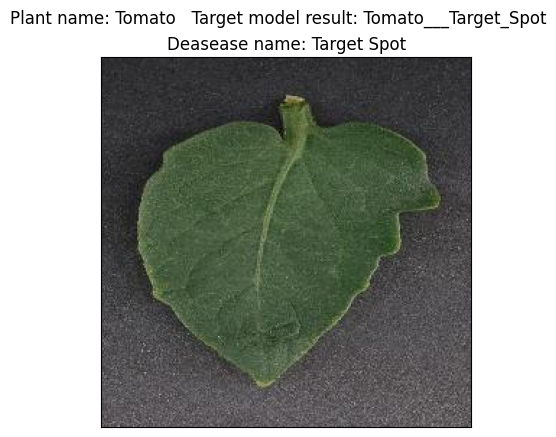

In [52]:
# displaying result
model_result = classes[result_index]
plant_name = ' '.join(model_result.split('_')[:-1])
deasease_name = ' '.join(model_result.split('___')[1].split('_'))
plt.imshow(img)
plt.suptitle(f'Plant name: {plant_name} model result: {model_result}')
plt.title(f'Deasease name: {deasease_name}')
plt.xticks([])
plt.yticks([])
plt.show()